In [1]:
%cd ..

/Users/trharvey/Documents/Python/LLM_SR


/Users/trharvey/llm/lib/python3.13/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
from kan import create_dataset, KAN
import openai
import LLM_LEx as LLMLEX
from LLM_LEx.kanLEx import KAN_LEx as KANLEX
import torch
import os
import matplotlib.pyplot as plt

In [6]:
client = openai.OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=os.getenv("OPENROUTER_API_KEY") if os.getenv("OPENROUTER_API_KEY") else "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",
)
LLMLEX.llm.check_key_limit(client)

2025-03-28 10:28:41,469 - LLMLEx.llm - INFO - API key check successful. Remaining limit: 91.40728195


91.40728195

# Try library

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = KAN(width=[1,4,1], grid=7, k=3, seed=10, device=device, symbolic_enabled=False)
kan_sr = KANLEX(model=model, client=client)

# create dataset
f = lambda x: (x**3 + torch.pi)**2
ranges = [-2, 2]
dataset = kan_sr.create_dataset(f, n_var=1, ranges=ranges, train_num=10000, test_num=1000)

checkpoint directory created: ./model
saving model version 0.0


2025-03-28 10:28:51,789 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 200 steps
| train_loss: 5.32e-03 | test_loss: 5.32e-03 | reg: 2.87e+01 | : 100%|█| 200/200 [00:54<00:00,  3.67


saving model version 0.1
Unpruned model. Pruning? True


2025-03-28 10:29:46,857 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-03-28 10:29:46,868 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-03-28 10:29:47,091 - LLMLEx.kanLEx - INFO - Final train loss: 0.005323893390595913


0.005323893390595913

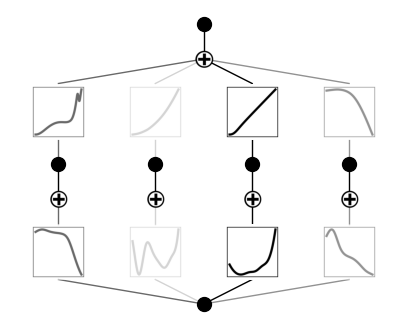

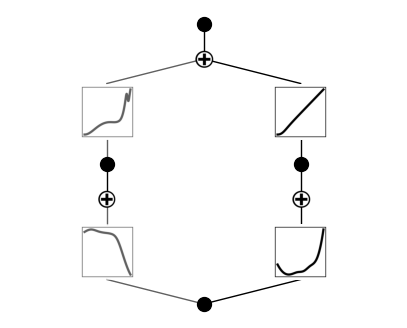

In [8]:
# # train KAN
kan_sr.train_kan(dataset,prune=True, steps=200)


2025-03-28 10:31:26,998 - LLMLEx.llm - INFO - API key usage check successful. Current usage: 108.59271805
2025-03-28 10:31:26,999 - LLMLEx.kanLEx - WARNING - Using default exit condition of 0.001. Consider passing 'overall_nchi_squared'as an exit condition - this is the n_chi_squared of the entire model on its inputs. It's not the default as this is not necessarily meaningful for each individual activation function.
2025-03-28 10:31:27,000 - LLMLEx.kanLEx - INFO - Converting KAN model to symbolic expressions (exit_condition=0.001)
2025-03-28 10:31:27,098 - LLMLEx.llm - INFO - API key usage check successful. Current usage: 108.59271805
2025-03-28 10:31:27,099 - LLMLEx.llmLEx - INFO - Processing KAN model connections
2025-03-28 10:31:27,100 - LLMLEx.llmLEx - INFO - Processing non-symbolic activation function (0,0,0)


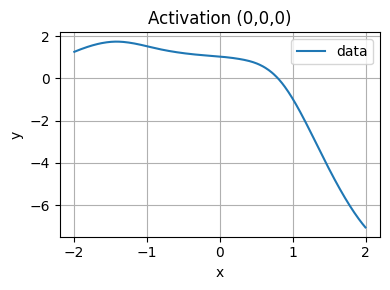

2025-03-28 10:31:27,212 - LLMLEx.llmLEx - INFO - Running genetic algorithm for connection (0,0,0)
2025-03-28 10:31:27,624 - LLMLEx.llmLEx - INFO - Constant function is not a good fit: Score: -22.02849769592285, for constant: [-0.20338983]
2025-03-28 10:31:27,624 - LLMLEx.llmLEx - INFO - Generating initial population asynchronously
2025-03-28 10:31:32,065 - LLMLEx.llmLEx - INFO - Generated 10 individuals
2025-03-28 10:31:32,066 - LLMLEx.llmLEx - INFO - Initial population best: score=-0.9091371893882751, params=[ 5.43055273  0.02302077 -1.05155487 -1.8479808  -4.2556314 ], ansatz: params[0] * np.cos(params[1] * x) + params[2] * x**2 + params[3] * x + params[4]...


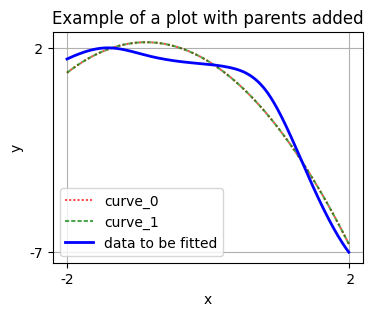

2025-03-28 10:31:32,138 - LLMLEx.llmLEx - INFO - Generation 1/3: Generating 10 new individuals. Elitism? False
2025-03-28 10:31:35,967 - LLMLEx.llmLEx - INFO - Generation 1 best: score=-0.0400126613676548, params=[-0.70588772 -2.46010309 -1.07382431 -1.75051094  1.20620391], ansatz: params[0] * np.sin(params[1] * x) + params[2] * x**2 + params[3] * x + params[4]...
2025-03-28 10:31:35,969 - LLMLEx.llmLEx - INFO - Generation 2/3: Generating 10 new individuals. Elitism? False
2025-03-28 10:31:40,707 - LLMLEx.llmLEx - INFO - Generation 2 best: score=-0.03773264214396477, params=[ 3.39761386e+01  6.35112633e-01 -2.56091647e+04 -6.67148316e-02
  5.59891039e+01 -1.73015103e+03  2.56103426e+04], ansatz: params[0] * np.tanh(params[1] * x) + params[2] * np.exp(params[3] * x) + params[4] * x**2 + params[5...
2025-03-28 10:31:40,708 - LLMLEx.llmLEx - INFO - Generation 3/3: Generating 10 new individuals. Elitism? False
2025-03-28 10:31:43,362 - LLMLEx.llmLEx - INFO - Generation 3 best: score=-0.21


API Call Statistics:
  Successful calls (end-to-end): 40
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 40 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 40 succeeded, 0 failed (100.00% success)
  Function Conversion: 40 succeeded, 0 failed (100.00% success)
  Curve Fitting: 40 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (0,0,0): params[0] * np.tanh(params[1] * x) + params[2] * np.exp(params[3] * x) + params[4] * x**2 + params[5] * x + params[6], with score -0.03773264214396477 and parameters [ 3.3976000e+01  6.3500000e-01 -2.5609165e+04 -6.7000000e-02
  5.5989000e+01 -1.7301510e+03  2.5610343e+04]


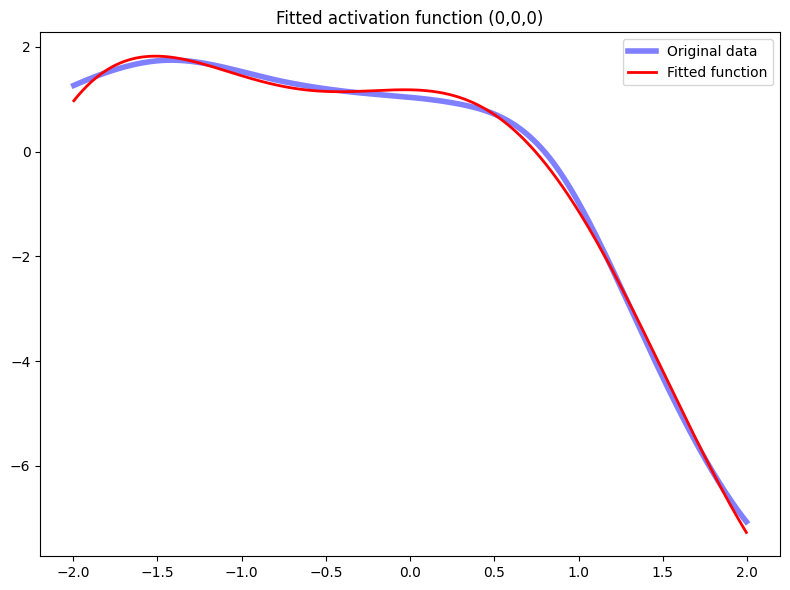

2025-03-28 10:31:43,452 - LLMLEx.llmLEx - INFO - Processing non-symbolic activation function (0,0,1)


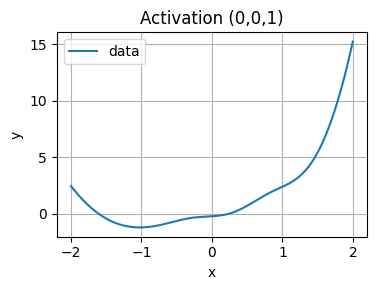

2025-03-28 10:31:43,514 - LLMLEx.llmLEx - INFO - Running genetic algorithm for connection (0,0,1)
2025-03-28 10:31:43,515 - LLMLEx.llmLEx - INFO - Constant function is not a good fit: Score: -7.512549877166748, for constant: [1.64547955]
2025-03-28 10:31:43,516 - LLMLEx.llmLEx - INFO - Generating initial population asynchronously
2025-03-28 10:31:47,568 - LLMLEx.llmLEx - INFO - Generated 10 individuals
2025-03-28 10:31:47,569 - LLMLEx.llmLEx - INFO - Initial population best: score=-0.35523971915245056, params=[ 0.42639859  1.84830807  1.15094295 -0.79898004], ansatz: params[0] * x**3 + params[1] * x**2 + params[2] * x + params[3]...


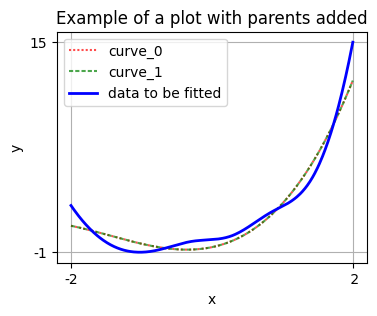

2025-03-28 10:31:47,638 - LLMLEx.llmLEx - INFO - Generation 1/3: Generating 10 new individuals. Elitism? False
2025-03-28 10:31:52,031 - LLMLEx.llmLEx - INFO - Generation 1 best: score=-0.07371155917644501, params=[-4.35804601e-01  1.51460628e+00  1.20144899e+00  2.24994909e-03
  4.13087392e+00], ansatz: params[0] + params[1] * x + params[2] * x**2 + params[3] * np.exp(params[4] * x)...
2025-03-28 10:31:52,032 - LLMLEx.llmLEx - INFO - Generation 2/3: Generating 10 new individuals. Elitism? False
2025-03-28 10:31:54,508 - LLMLEx.llmLEx - INFO - Generation 2 best: score=-0.020716683939099312, params=[ 0.20433706  2.25935379 -0.66171282  1.38331663 -0.37841375], ansatz: params[0] * np.exp(params[1] * x) + params[2] * x**3 + params[3] * x + params[4]...
2025-03-28 10:31:54,510 - LLMLEx.llmLEx - INFO - Generation 3/3: Generating 10 new individuals. Elitism? False
2025-03-28 10:31:59,263 - LLMLEx.llmLEx - INFO - Generation 3 best: score=-0.015549208037555218, params=[ 1.05233588  1.67676651 


API Call Statistics:
  Successful calls (end-to-end): 40
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 40 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 40 succeeded, 0 failed (100.00% success)
  Function Conversion: 40 succeeded, 0 failed (100.00% success)
  Curve Fitting: 40 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (0,0,1): params[0] * np.exp(params[1] * x) + params[2] * x**3 + params[3] * x**2 + params[4], with score -0.015549208037555218 and parameters [ 1.052  1.677 -1.049 -1.238 -1.138]


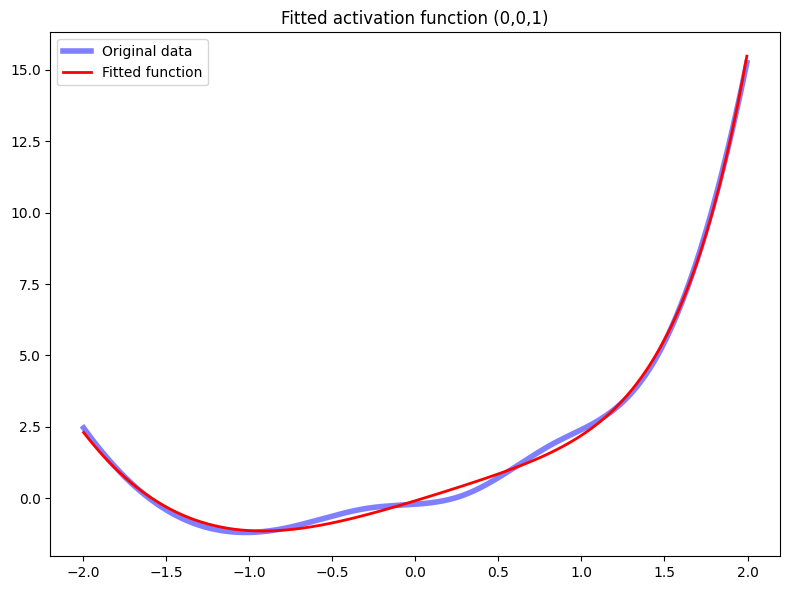

2025-03-28 10:31:59,365 - LLMLEx.llmLEx - INFO - Processing non-symbolic activation function (1,0,0)


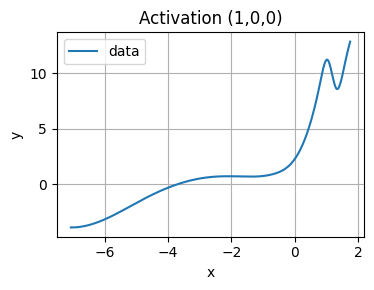

2025-03-28 10:31:59,429 - LLMLEx.llmLEx - INFO - Running genetic algorithm for connection (1,0,0)
2025-03-28 10:31:59,430 - LLMLEx.llmLEx - INFO - Constant function is not a good fit: Score: -6.0016326904296875, for constant: [6.84198949]
2025-03-28 10:31:59,431 - LLMLEx.llmLEx - INFO - Generating initial population asynchronously
2025-03-28 10:32:03,152 - LLMLEx.llmLEx - INFO - Generated 10 individuals
2025-03-28 10:32:03,153 - LLMLEx.llmLEx - INFO - Initial population best: score=-0.2997359037399292, params=[-3.72863807 -0.08173025  1.637552    1.28346621  8.17229332  0.32798232], ansatz: params[0] + params[1] * x + params[2] * np.sin(params[3] * x) + params[4] * np.exp(params[5] * x)...


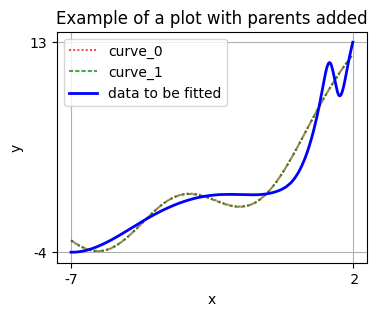

2025-03-28 10:32:03,224 - LLMLEx.llmLEx - INFO - Generation 1/3: Generating 10 new individuals. Elitism? False
2025-03-28 10:32:04,473 - LLMLEx.llmLEx - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm sorry, I can't do that.'
2025-03-28 10:32:04,630 - LLMLEx.llmLEx - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm sorry, I cannot assist with this.'
2025-03-28 10:32:09,765 - LLMLEx.fit - INFO - All methods failed for this fit <function <lambda> at 0x3336ee5c0> Optimal parameters not found: Number of calls to function has reached maxfev = 7000.
2025-03-28 10:32:09,794 - LLMLEx.llmLEx - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm sorry, I can't assist with this request.'
2025-03-28 10:32:12,574 - LLMLEx.llmLEx - INFO - Generation 1 best: score=-0.2997690737247467, params=[-3.18760270e+00  1.63449930e+00  1.28475318e+00  7.62780947e+00
  3.39979596e-01  2.48859588e-03], ansatz: params[0] + params[1] * np.sin(params


API Call Statistics:
  Successful calls (end-to-end): 40
  Failed calls: 4
  Success rate: 90.91%

Breakdown by processing stage:
  Api Call: 44 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 41 succeeded, 3 failed (93.18% success)
  Function Conversion: 41 succeeded, 0 failed (100.00% success)
  Curve Fitting: 40 succeeded, 1 failed (97.56% success)

Error types:
  Extraction Errors:
    - llm refusal: 3
  Fitting Errors:
    - numerical error: 1

Validation issues:
  - nan values: 1

Fitting warnings:
  - covariance estimation: 2
  - invalid log: 8
Approximation for (1,0,0): params[0] + params[1] * np.sin(params[2] * x) + params[3] * np.exp(params[4] * x) + params[5] * x**2 + params[6] * x**3, with score -0.20445004105567932 and parameters [-9.159  1.433 -5.307 13.547  0.248  0.425  0.054]


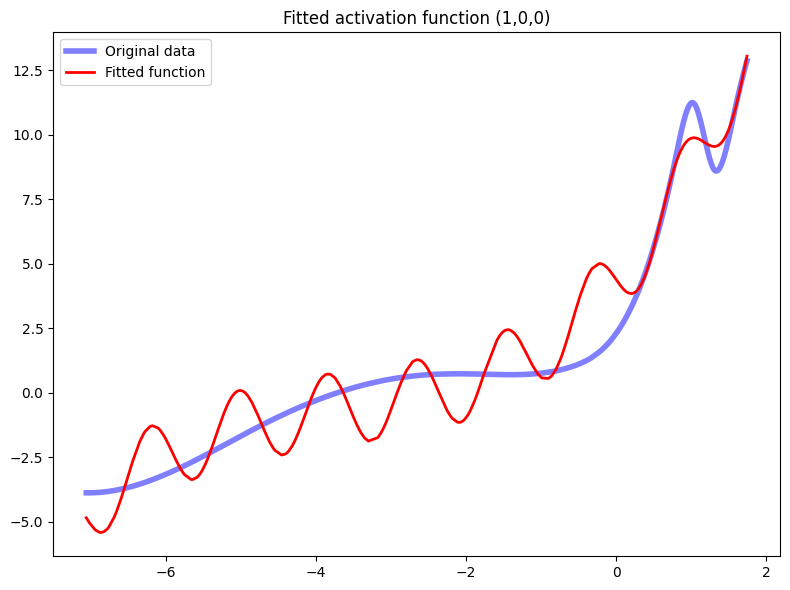

2025-03-28 10:32:22,626 - LLMLEx.llmLEx - INFO - Processing non-symbolic activation function (1,1,0)


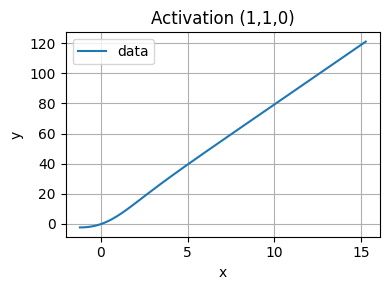

2025-03-28 10:32:22,689 - LLMLEx.llmLEx - INFO - Running genetic algorithm for connection (1,1,0)
2025-03-28 10:32:22,690 - LLMLEx.llmLEx - INFO - Constant function is not a good fit: Score: -46.98598098754883, for constant: [13.9922449]
2025-03-28 10:32:22,690 - LLMLEx.llmLEx - INFO - Generating initial population asynchronously
2025-03-28 10:32:24,378 - LLMLEx.llmLEx - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm sorry, I can't help with that.'
2025-03-28 10:32:27,229 - LLMLEx.llmLEx - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm sorry, I can't create an ansatz without more specific information. Could you provide additional context or data?'
2025-03-28 10:32:30,007 - LLMLEx.llmLEx - INFO - Generated 10 individuals
2025-03-28 10:32:30,008 - LLMLEx.llmLEx - INFO - Found 7 non-finite scores, setting all to -0.637165904045105. Example ansatz: params[0] * np.log(x + params[1]) + params[2] * x
2025-03-28 10:32:30,008 - LLMLEx.llmLEx - I

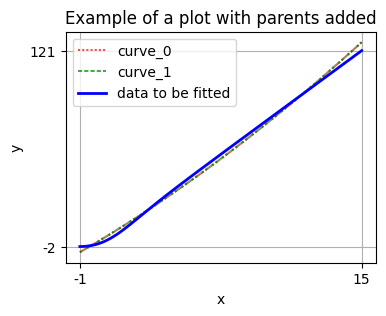

2025-03-28 10:32:30,080 - LLMLEx.llmLEx - INFO - Generation 1/3: Generating 10 new individuals. Elitism? False
2025-03-28 10:32:39,092 - LLMLEx.llmLEx - INFO - Generation 1 best: score=nan, params=[1. 1. 1. 1.], ansatz: params[0] * np.log(x + params[1]) + params[2] * x + params[3]...
2025-03-28 10:32:39,093 - LLMLEx.llmLEx - INFO - Generation 2/3: Generating 10 new individuals. Elitism? False
<string>:1: RuntimeWarning: invalid value encountered in log1p
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log1p
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: invalid value encounter


API Call Statistics:
  Successful calls (end-to-end): 40
  Failed calls: 3
  Success rate: 93.02%

Breakdown by processing stage:
  Api Call: 43 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 41 succeeded, 2 failed (95.35% success)
  Function Conversion: 41 succeeded, 0 failed (100.00% success)
  Curve Fitting: 40 succeeded, 1 failed (97.56% success)

Error types:
  Extraction Errors:
    - llm refusal: 2
  Fitting Errors:
    - numerical error: 1

Validation issues:
  - nan values: 29

Fitting warnings:
  - covariance estimation: 29
  - other warnings: 1
  - invalid log: 168
  - invalid power: 3003
Approximation for (1,1,0): params[0] * x**2 + params[1] * x + params[2], with score -0.3185829520225525 and parameters [0.108 6.515 1.732]


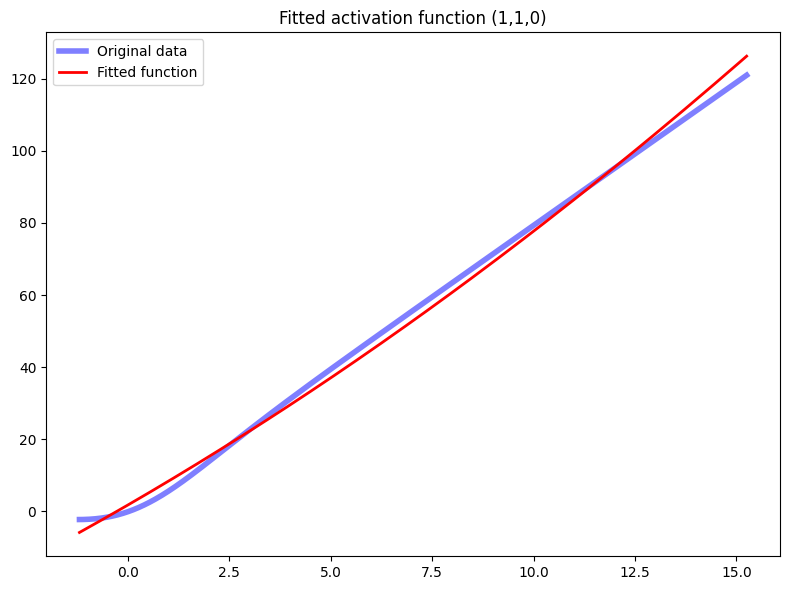

2025-03-28 10:32:49,552 - LLMLEx.llmLEx - INFO - KAN conversion complete: 4 total connections
2025-03-28 10:32:49,552 - LLMLEx.llmLEx - INFO - Connection breakdown: 0 symbolic, 0 zero, 4 processed
2025-03-28 10:32:49,656 - LLMLEx.llm - INFO - API key usage check successful. Current usage: 108.59271805
2025-03-28 10:32:49,657 - LLMLEx.llmLEx - INFO - API key usage whilst this kan_to_symbolic was running: $0.00
2025-03-28 10:32:49,657 - LLMLEx.kanLEx - INFO - Approximation for (0, 0, 0): params[0] * np.tanh(params[1] * x) + params[2] * np.exp(params[3] * x) + params[4] * x**2 + params[5] * x + params[6], has parameters [ 3.40000e+01  6.00000e-01 -2.56092e+04 -1.00000e-01  5.60000e+01
 -1.73020e+03  2.56103e+04]
2025-03-28 10:32:49,658 - LLMLEx.kanLEx - INFO - Approximation for (0, 0, 1): params[0] * np.exp(params[1] * x) + params[2] * x**3 + params[3] * x**2 + params[4], has parameters [ 1.1  1.7 -1.  -1.2 -1.1]
2025-03-28 10:32:49,658 - LLMLEx.kanLEx - INFO - Approximation for (1, 0, 0)

KeyboardInterrupt: 

In [9]:
# fit KAN
best_expressions, best_chi_squareds, results_all_dicts, all_results_sorted = kan_sr.get_symbolic(population=10, generations=4, plot_parents=True, demonstrate_parent_plotting=True)

2025-03-13 19:45:24,445 - LLMSR.kansr - INFO - Using internal dataset for plotting
2025-03-13 19:45:24,446 - LLMSR.kansr - INFO - Using provided ranges: [-2, 2]
2025-03-13 19:45:24,447 - LLMSR.kansr - INFO - Using self.f function for ground truth
2025-03-13 19:45:24,456 - LLMSR.kansr - INFO - Plotting raw expression
2025-03-13 19:45:24,457 - LLMSR.kansr - INFO - Plotting simplified and refitted/pruned raw expression
2025-03-13 19:45:24,458 - LLMSR.kansr - INFO - Plotting simplified by LLM expression
2025-03-13 19:45:24,459 - LLMSR.kansr - INFO - Argument x of learned function are arraylike, NOT x0, x1, etc.
2025-03-13 19:45:24,460 - LLMSR.kansr - WARNING - Error in processing symbolic KAN directly to python function: KANSR._find_optimised_for_full_python_kan_function() got multiple values for argument 'try_jax'
2025-03-13 19:45:24,460 - LLMSR.kansr - WARNING - Error processing generated function: unsupported operand type(s) for -: 'float' and 'NoneType'


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'KAN Symbolic Regression Results'}, xlabel='x', ylabel='y'>)

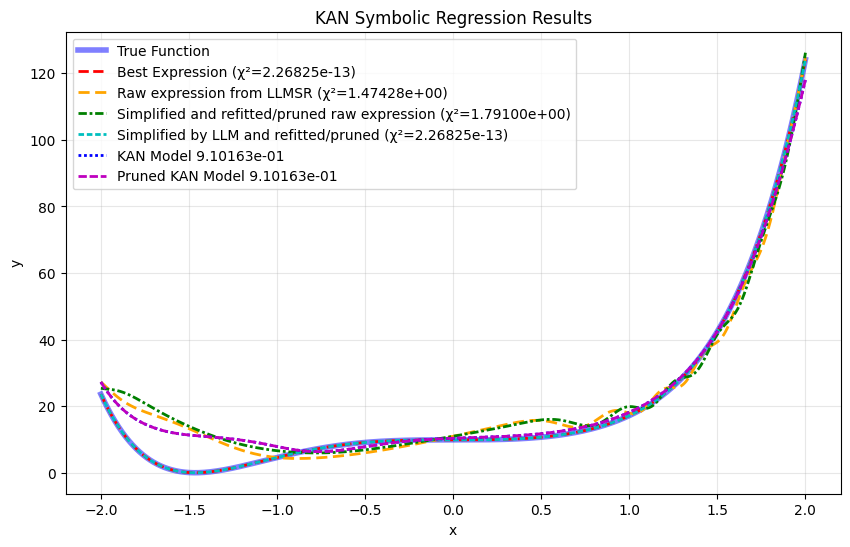

In [ ]:
kan_sr.plot_results(ranges, kan_sr.results_all_dicts[0],title="KAN Symbolic Regression Results", plot_using_generate_f=True)

In [ ]:
best_expressions, best_chi_squareds, results_all_dicts

(['5.02928795649652*x0**4 + 5.7635072182088*x0**3 - 6.30579157438488*x0**2 + 0.771673936874222*x0 + 11.0110812042574'],
 [0.053780339658260345],
 [{'raw_expression': '-11.3188246094408*x0**3 - 29.6804520735595*x0**2 - 44.2073000021093*x0 + 8237.71588018229*(-0.0133268628813515*x0**2 - 0.909412169504952*np.sin(0.583767336297769*x0) + np.tanh(0.529854070923374*x0) + 0.0149699703145007)**3 + 6.34428104224309*(-0.227043610192679*x0**3 - 0.595358371867609*x0**2 - 0.8867515255054*x0 + 0.994976295888124*np.exp(1.09982855106399*x0) - 0.0213802024691279*np.sin(5.05503079371796*x0) - 1)**2 + 49.6026387800626*np.exp(1.09982855106399*x0) - 1.06586907095523*np.sin(5.05503079371796*x0) - 0.529869623008788*np.cos(1.2913543414044*x0**2 + 88.1207650796443*np.sin(0.583767336297769*x0) - 96.8985989351933*np.tanh(0.529854070923374*x0) - 1.45056914957656) - 4.98711961638412*np.tanh(2.46065780802548*x0**2 + 167.912897095765*np.sin(0.583767336297769*x0) - 184.638937905538*np.tanh(0.529854070923374*x0) - 1.84

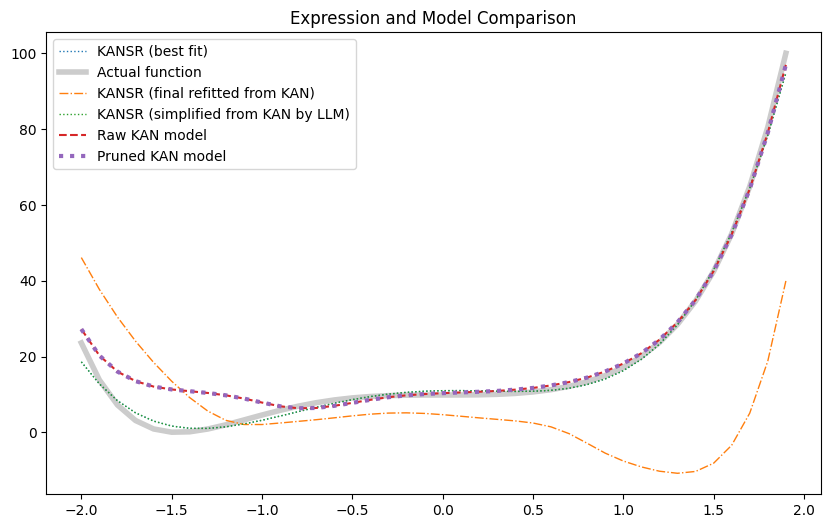

In [ ]:
import numpy as np
f_orig = lambda x0: (x0**3 + torch.pi)**2
f_kan_fitted= lambda x0: eval(results_all_dicts[0]['final_refitted_expression'])
f_llm_fitted = lambda x0: eval(results_all_dicts[0]['final_LLM_expression'])
f_best_fitted = lambda x0: eval(best_expressions[0])
xs = np.arange(ranges[0], ranges[1], .1)

# Convert to tensor for model evaluation
xs_tensor = torch.tensor(xs, dtype=torch.float32).unsqueeze(1).to(device)

# Evaluate the KAN models
raw_kan_outputs = kan_sr.raw_model(xs_tensor).cpu().detach().numpy().flatten()
pruned_kan_outputs = kan_sr.model(xs_tensor).cpu().detach().numpy().flatten()

# Plot all expressions and models
plt.figure(figsize=(10, 6))
plt.plot(xs, [f_best_fitted(x) for x in xs], linestyle=':', label="KANSR (best fit)", linewidth=1)  
plt.plot(xs, [f_orig(x) for x in xs], linestyle='-', c='black', label="Actual function", linewidth=4, alpha=0.2)
plt.plot(xs, [f_kan_fitted(x) for x in xs], linestyle='-.', label="KANSR (final refitted from KAN)", linewidth=1)
plt.plot(xs, [f_llm_fitted(x) for x in xs], linestyle=':', label="KANSR (simplified from KAN by LLM)", linewidth=1)
plt.plot(xs, raw_kan_outputs, linestyle='--', label="Raw KAN model", linewidth=1.5)
plt.plot(xs, pruned_kan_outputs, linestyle=':', label="Pruned KAN model", linewidth=3)
plt.legend()
plt.title("Expression and Model Comparison")
plt.show()


# Try $e^{1.83169-3.35509/x}$

2025-03-13 18:26:49,036 - LLMSR.kansr - INFO - Training KAN model with LBFGS optimiser for 500 steps


cpu
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.80e-06 | test_loss: 4.76e-06 | reg: 9.12e+00 | : 100%|█| 500/500 [01:24<00:00,  5.93


saving model version 0.1
Unpruned model. Pruning? True


2025-03-13 18:28:13,584 - LLMSR.kansr - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-03-13 18:28:13,593 - LLMSR.kansr - INFO - Pruned model:
2025-03-13 18:28:13,664 - LLMSR.kansr - INFO - Final train loss: 4.801643626706209e-06
2025-03-13 18:28:13,665 - LLMSR.kansr - INFO - Trained model:


saving model version 0.2


2025-03-13 18:28:13,884 - LLMSR.kansr - INFO - Pruned model:
2025-03-13 18:28:14,283 - LLMSR.llm - INFO - API key usage check successful. Current usage: 55.119323446
2025-03-13 18:28:14,284 - LLMSR.kansr - WARNING - Using default exit condition of 0.001. Consider passing 'overall_nchi_squared'as an exit condition - this is the n_chi_squared of the entire model on its inputs. It's not the default as this is not necessarily meaningful for each individual activation function.
2025-03-13 18:28:14,284 - LLMSR.kansr - INFO - Converting KAN model to symbolic expressions (exit_condition=0.001)
2025-03-13 18:28:14,391 - LLMSR.llm - INFO - API key usage check successful. Current usage: 55.119323446
2025-03-13 18:28:14,392 - LLMSR.llmSR - INFO - Processing KAN model connections
2025-03-13 18:28:14,392 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,0)


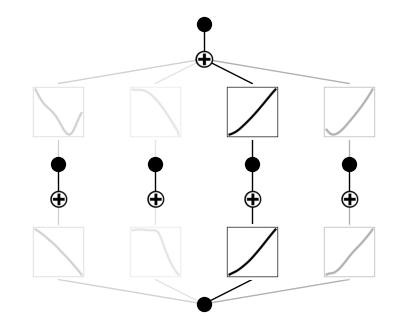

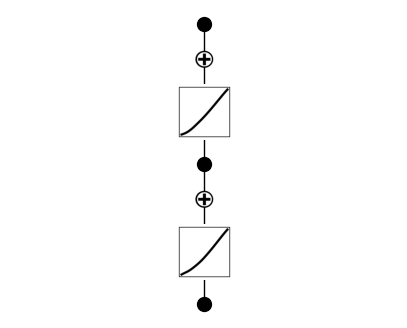

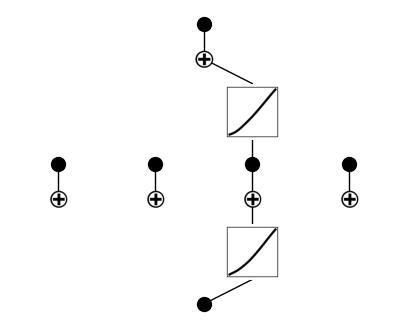

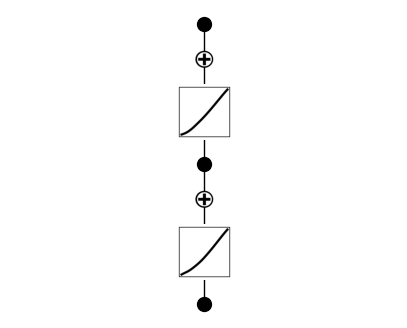

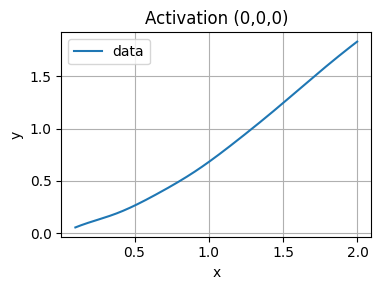

2025-03-13 18:28:14,880 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,0)
2025-03-13 18:28:14,881 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: -1.392931342124939, for constant: [0.79882429]
2025-03-13 18:28:14,882 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-13 18:28:21,490 - LLMSR.llmSR - INFO - Generated 25 individuals
2025-03-13 18:28:21,496 - LLMSR.llmSR - INFO - Initial population best: score=-0.00045989485806785524, params=[0.65466366 1.48998307 0.0349917 ], ansatz: params[0] * np.power(x, params[1]) + params[2]...
2025-03-13 18:28:21,499 - LLMSR.llmSR - INFO - Exit condition met after initial population
2025-03-13 18:28:21,501 - LLMSR.llmSR - INFO - Successfully found expression for connection (0,0,0)



API Call Statistics:
  Successful calls (end-to-end): 25
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 25 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 25 succeeded, 0 failed (100.00% success)
  Function Conversion: 25 succeeded, 0 failed (100.00% success)
  Curve Fitting: 25 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (0,0,0): params[0] * np.power(x, params[1]) + params[2], with score -0.00045989485806785524 and parameters [0.655 1.49  0.035]


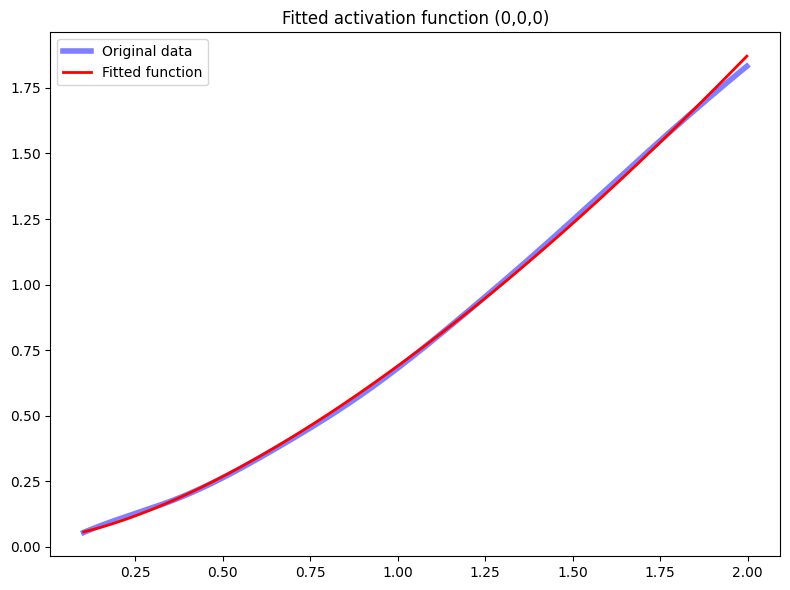

2025-03-13 18:28:21,571 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,0,0)


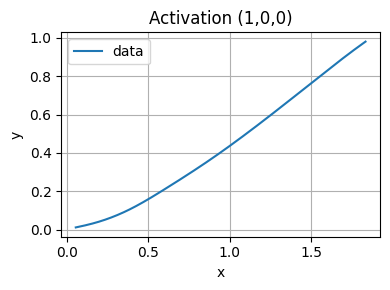

2025-03-13 18:28:21,803 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,0,0)
2025-03-13 18:28:21,805 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: -1.8484982252120972, for constant: [0.35598678]
2025-03-13 18:28:21,805 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-13 18:28:23,723 - LLMSR.fit - WARNING - curve fitting: invalid value encountered in log
2025-03-13 18:28:27,868 - LLMSR.llmSR - INFO - Generated 25 individuals
2025-03-13 18:28:27,868 - LLMSR.llmSR - INFO - Initial population best: score=-0.0001646207965677604, params=[-0.39753642  2.01820503  0.8765595 ], ansatz: params[0] * np.log(params[1] * x + 1) + params[2] * x...
2025-03-13 18:28:27,868 - LLMSR.llmSR - INFO - Exit condition met after initial population
2025-03-13 18:28:27,868 - LLMSR.llmSR - INFO - Successfully found expression for connection (1,0,0)



API Call Statistics:
  Successful calls (end-to-end): 25
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 25 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 25 succeeded, 0 failed (100.00% success)
  Function Conversion: 25 succeeded, 0 failed (100.00% success)
  Curve Fitting: 25 succeeded, 0 failed (100.00% success)

Error types:
  No errors

Fitting warnings:
  - invalid log: 1
Approximation for (1,0,0): params[0] * np.log(params[1] * x + 1) + params[2] * x, with score -0.0001646207965677604 and parameters [-0.398  2.018  0.877]


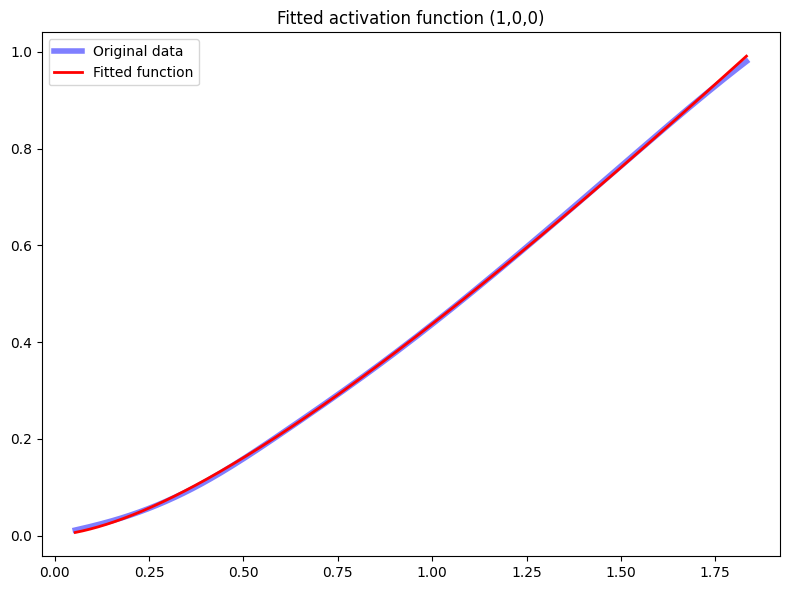

2025-03-13 18:28:27,951 - LLMSR.llmSR - INFO - KAN conversion complete: 2 total connections
2025-03-13 18:28:27,952 - LLMSR.llmSR - INFO - Connection breakdown: 0 symbolic, 0 zero, 2 processed
2025-03-13 18:28:28,083 - LLMSR.llm - INFO - API key usage check successful. Current usage: 55.119323446
2025-03-13 18:28:28,083 - LLMSR.llmSR - INFO - API key usage whilst this kan_to_symbolic was running: $0.00
2025-03-13 18:28:28,084 - LLMSR.kansr - INFO - Approximation for (0, 0, 0): params[0] * np.power(x, params[1]) + params[2], has parameters [0.7 1.5 0. ]
2025-03-13 18:28:28,084 - LLMSR.kansr - INFO - Approximation for (1, 0, 0): params[0] * np.log(params[1] * x + 1) + params[2] * x, has parameters [-0.4  2.   0.9]
2025-03-13 18:28:28,085 - LLMSR.kansr - INFO - Building expression tree
2025-03-13 18:28:28,085 - LLMSR.kansr - INFO - KAN Connection: (0, 0, 0), Best Expression: 0.6546636579739875 * np.power( x , 1.4899830700918997) + 0.0349917039098581, Score: -0.00046
2025-03-13 18:28:28,08

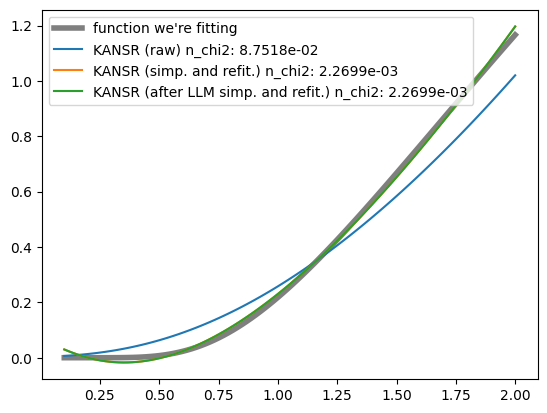

2025-03-13 18:29:26,776 - LLMSR.kansr - INFO - 
###############################
# Final formula for output 0: #
###############################
2025-03-13 18:29:26,776 - LLMSR.kansr - INFO - Best expression n_chi2 2.270e-03 from rawrefitted fit: 1.17500218265285*x0**1.20591454314111 - 0.899306555094654*log(1.67209081227281*x0**1.20591454314111 + 0.804907362500822) - 0.129081796109814
2025-03-13 18:29:26,776 - LLMSR.kansr - INFO - Round to 4sf: 1.175*x0**1.206 - 0.8993*log(1.672*x0**1.206 + 0.8049) - 0.1291
2025-03-13 18:29:26,776 - LLMSR.kansr - INFO - 

###############################
2025-03-13 18:29:26,776 - LLMSR.kansr - INFO - # Top 10 Best Fits Overall #
2025-03-13 18:29:26,777 - LLMSR.kansr - INFO - ###############################
2025-03-13 18:29:26,777 - LLMSR.kansr - INFO - 

###############################
2025-03-13 18:29:26,777 - LLMSR.kansr - INFO - # Top 10 Best Fits Overall #
2025-03-13 18:29:26,777 - LLMSR.kansr - INFO - ###############################
2025-03-13 18:29

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create dataset - must be a torch function
f2 = lambda x: torch.exp(1.83169-3.35509/x)
ranges = [0.1, 2.]
# Run the complete pipeline
# Initialize a new KANSR instance
kansr2 = KANLEX(
    client=client,
    width=[1, 4, 1],  # Using a slightly different architecture
    grid=7,
    k=3,
    seed=17,
    symbolic_enabled=False
)
results = kansr2.run_complete_pipeline(
    client=client,
    f=f2,
    ranges=ranges,
    train_steps=500,
    generations=10,
    gpt_model="openai/gpt-4o",
    node_th=0.2,
    edge_th=0.2,
    optimiser="LBFGS",
    population=25,
    temperature=0.1,
    verbose=1,
    plot_fit=True,
    plot_parents=True,
    demonstrate_parent_plotting=True
)
